# Content Of This Notebook :
* Data Importing
* Overview to Dataset
* Data Analysis With Visualization
* Feature Engineering
* Modeling
* Solution Of The Imbalanced Dataset Problem
* Under-Sampling and Over-Sampling (SVM-SMOTE) Methods
* Evaluating Models With Different Metrics
* Comparing ML Algorithms
* Ensemble Learning (Voting Classifier)

## About The Dataset
* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Overview to Dataset

In [182]:
df = pd.read_csv("datasets/Hotel Reservations.csv")

print("shape of dataset :",df.shape)
df.head()

shape of dataset : (36275, 19)


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* We have no missing values

In [184]:
df.duplicated().sum()

np.int64(0)

* We have no duplicated rows

Text(0.5, 1.0, 'Missing values heatmap')

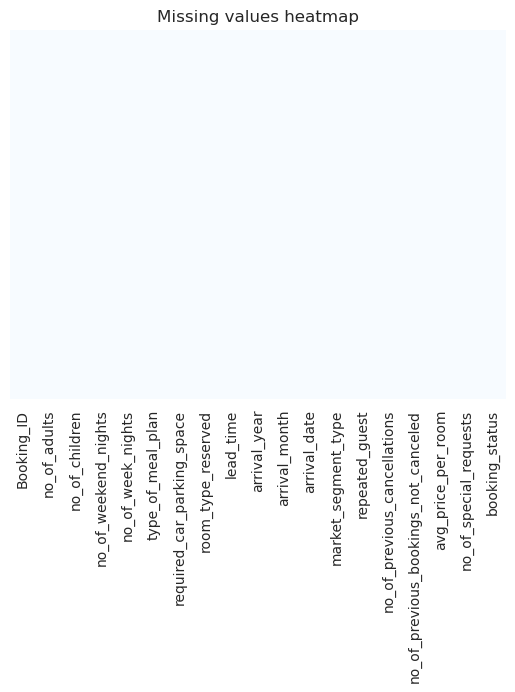

In [185]:
# Check NaNs
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = "Blues").set_title("Missing values heatmap")

# VISUALIZATION

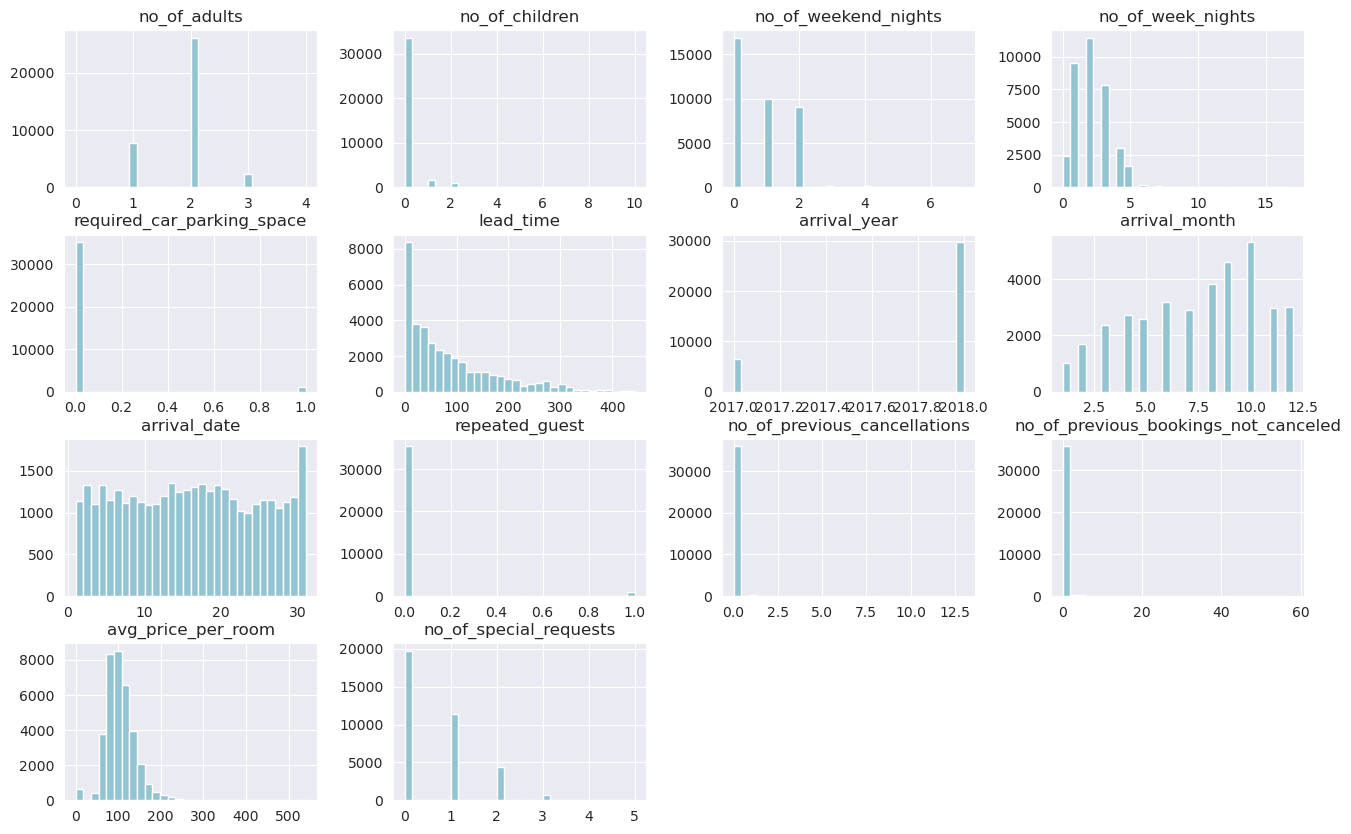

In [186]:
# Plot non categotical Variables
sns.set_style("darkgrid")
df.hist(bins = 30, figsize=(16,10), color = '#93c4d2')
plt.show()

Text(0.5, 1.0, 'Cancellation Situation')

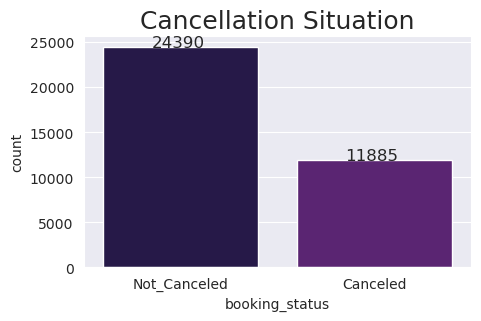

In [187]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(5,3))
ax = sns.countplot(x=df.booking_status,palette= sns.color_palette("magma"))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01),fontsize=12)
plt.title("Cancellation Situation",fontsize=18)

* Canceled and Not canceled classes were not distributed balanced so it may cause an imbalanced dataset problem. I will check it out.

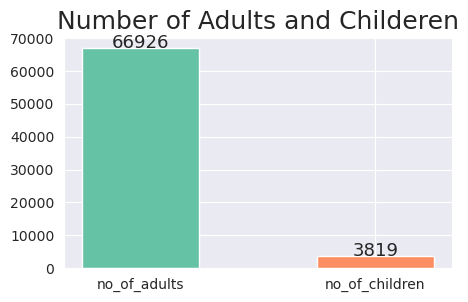

In [188]:
fig, ax = plt.subplots(figsize=(5,3))
ax.bar(np.arange(2),[df.no_of_adults.sum(),df.no_of_children.sum()],width=0.5, color=sns.color_palette("Set2"))
plt.xticks(np.arange(2),("no_of_adults","no_of_children"))

plt.title("Number of Adults and Childeren",fontsize=18);
for i, v in enumerate([df.no_of_adults.sum(),df.no_of_children.sum()]):
    ax.text(i, v + 0.5, str(v), ha='center',fontsize=13)

Text(0.5, 1.0, 'Booking Distribution By The Days Of Months')

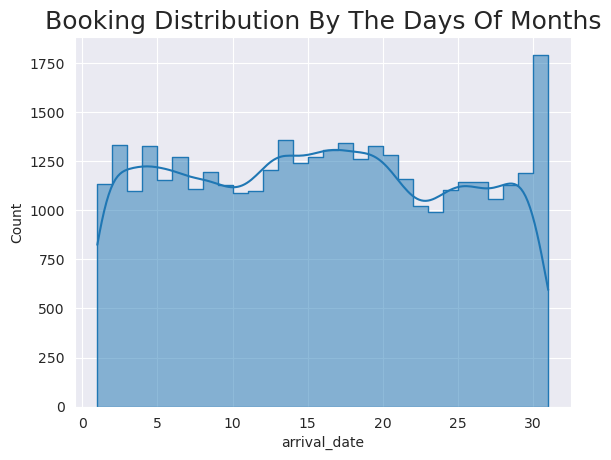

In [189]:
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. 
# KDE represents the data using a continuous probability density curve in one or more dimensions.
sns.histplot(data= df, x= "arrival_date", element="step", kde=True, bins=30)
plt.title("Booking Distribution By The Days Of Months",fontsize=18)

In [190]:
df[df["avg_price_per_room"] == 0].shape

(545, 19)

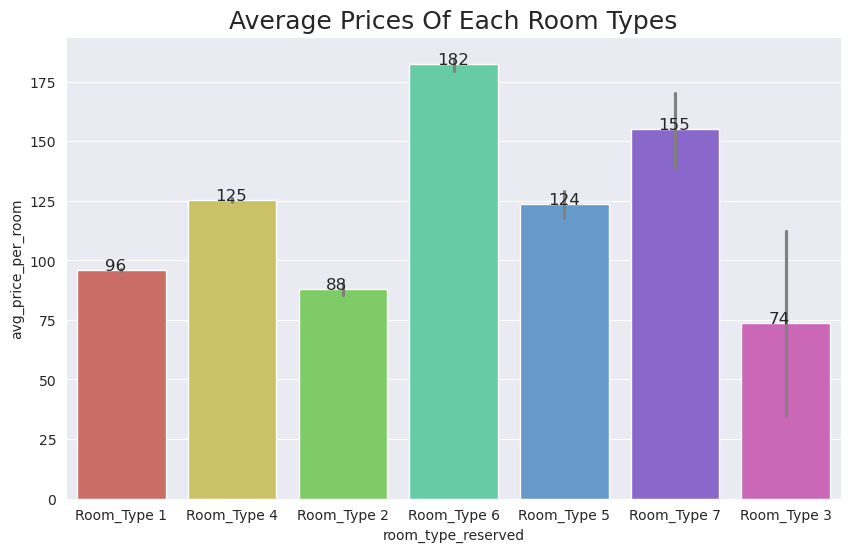

In [191]:
plt.figure(figsize=(10,6))

ax = sns.barplot(x= df.room_type_reserved, 
    y= df.avg_price_per_room,
    palette = "hls",
    #errorbar="ci", # Confidence Interval (sns uses Bootstrapping method)
    errcolor= "0.5")
plt.title("Average Prices Of Each Room Types",fontsize=18)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01),fontsize=12)

In [192]:
# I could drop where we have 0 cost, it change te real average price mean()
#room_3_list = room_3_list[(room_3_list  != 0)]
#room_3_list.describe()

* Room type 6 is vastly the most expensive one and Room type 2 is the cheapest one.
* Room type 3 has a low Confidence Interval

Distribution test

In [193]:
# Check distribution 
#from sebadefs import distribution_analysis
#distribution_analysis(df.repeated_guest)

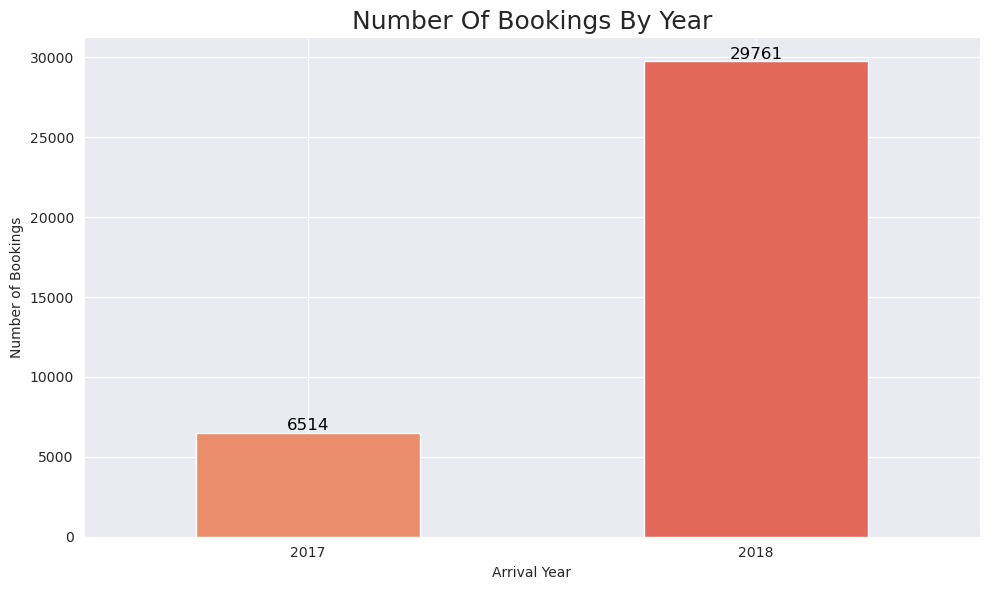

In [194]:
# Ensure arrival_year is numeric and handle potential missing values
df['arrival_year'] = pd.to_numeric(df['arrival_year'], errors='coerce')
df = df.dropna(subset=['arrival_year'])

# Use value_counts() for aggregation
arrival_year_counts = df['arrival_year'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
ax = arrival_year_counts.plot(kind='bar', color=sns.color_palette("flare"))

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Number Of Bookings By Year", fontsize=18)
plt.xlabel("Arrival Year")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Text(0.5, 1.0, 'Number Of Booking By Year')

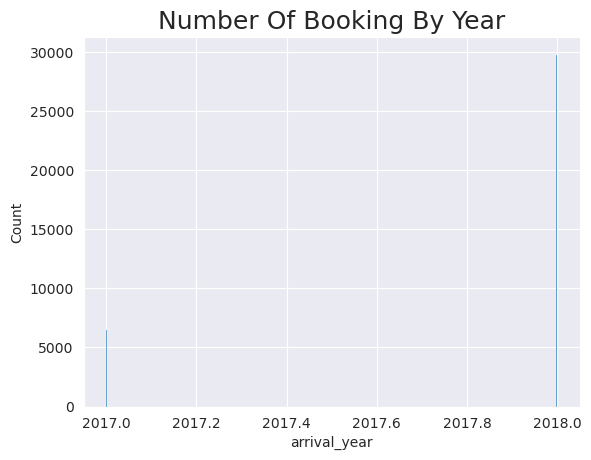

In [195]:
sns.histplot(df.arrival_year)
plt.title("Number Of Booking By Year",fontsize=18)

* Our samples are mostly from 2018

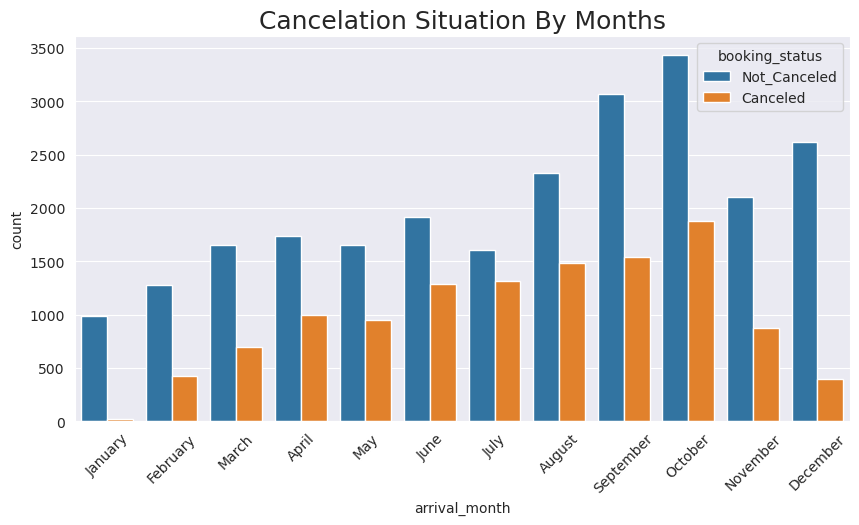

In [196]:
plt.figure(figsize=(10,5))
sns.countplot(x= df.arrival_month,hue=df.booking_status) #palette=sns.color_palette(["#0000ff","#006400"])
plt.xticks(np.arange(0,12),["January","February","March","April","May","June",
                           "July","August","September","October","November","December"],rotation=45)
plt.title("Cancelation Situation By Months",fontsize=18);

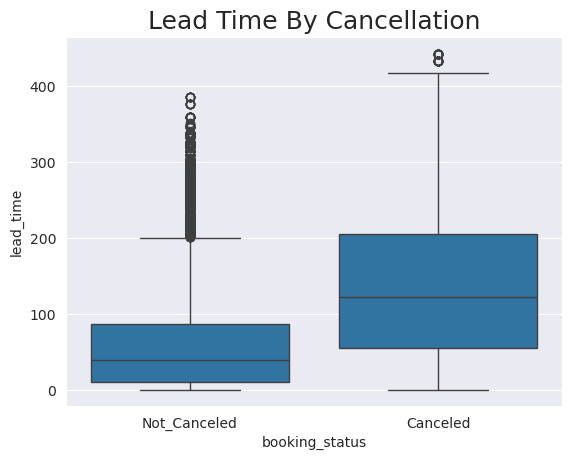

In [197]:
sns.boxplot(data=df, x="booking_status", y="lead_time")
plt.title("Lead Time By Cancellation",fontsize=18);

* We can say that as the lead time increases the possibility of canceling increases

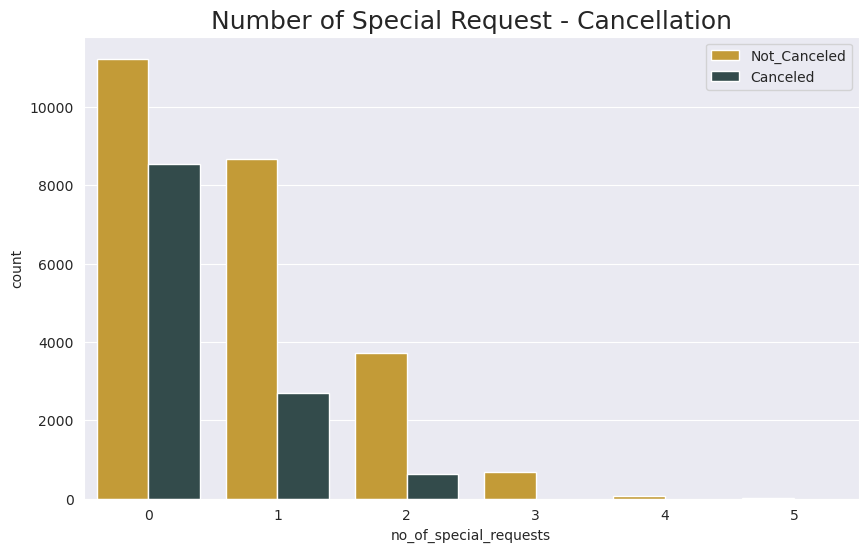

In [198]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.no_of_special_requests, hue=df.booking_status,palette=sns.color_palette(["#daa520","#2f4f4f"]))
plt.title("Number of Special Request - Cancellation",fontsize=18);
plt.legend(loc="upper right")

* The cancelation rate is higher for the guests who don't have a special request compare to others.

In [199]:
df.groupby("repeated_guest")["booking_status"].value_counts()

repeated_guest  booking_status
0               Not_Canceled      23476
                Canceled          11869
1               Not_Canceled        914
                Canceled             16
Name: count, dtype: int64

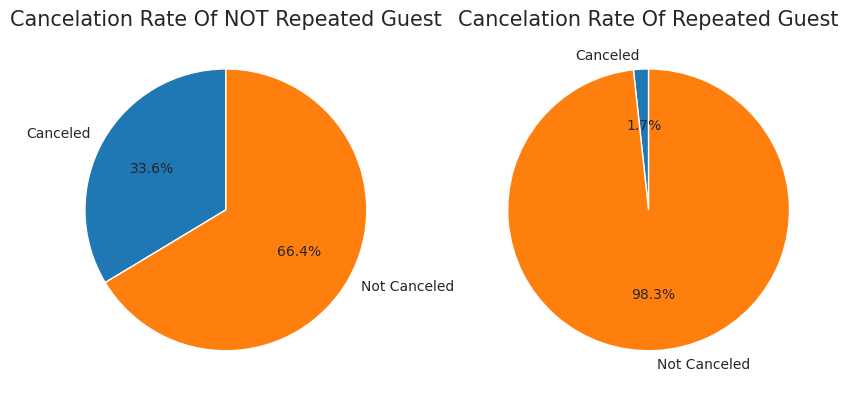

In [200]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'aspect': 'equal'})
ax[0].pie([11896,23476], labels=["Canceled","Not Canceled"], autopct='%1.1f%%', startangle=90)
ax[0].set_title("Cancelation Rate Of NOT Repeated Guest",fontsize=15)
ax[1].pie([16,914], labels=["Canceled","Not Canceled"], autopct='%1.1f%%', startangle=90)
ax[1].set_title("Cancelation Rate Of Repeated Guest",fontsize=15);

* The cancelation rate is higher for not repeated guest compare to repeated ones.
* Most of the repeated guest did not cancel their booking.

# FEATURE ENGINEERING

## booking_status (Target Column)
* I will do encoding, take "Not_Canceled" as 0 and "Canceled" as 1.

In [201]:
df.booking_status = df.booking_status.replace({"Not_Canceled":0, "Canceled":1})

### Correlation of Columns

In [202]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,0
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,1
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,0
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,1


<Axes: >

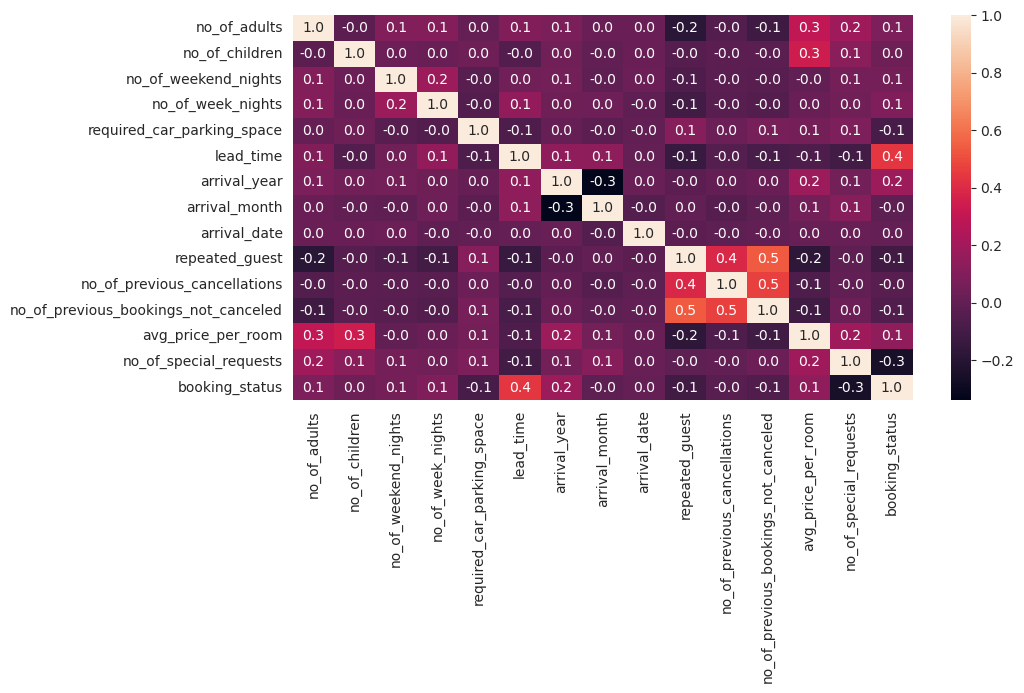

In [203]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(method='pearson', numeric_only=True),annot=True, fmt=".1f")

## "no_of_adults" and "no_of_children"
* I will use PCA method for these columns because they represent similar features and have close correlation. Instead of taking one of them i aim to benefit from both.

In [204]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca_no_people = pca.fit_transform(df[["no_of_adults","no_of_children"]])
df["no_of_people"] = pca_no_people

df.drop(columns=["no_of_adults","no_of_children"],inplace=True)

## "no_of_weekend_nights" and "no_of_week_nights"
* I will also use PCA for these columns because of the same reason too.

In [205]:
pca_no_week = pca.fit_transform(df[["no_of_weekend_nights","no_of_week_nights"]])
df["no_of_week_days"] = pca_no_week

df.drop(columns=["no_of_weekend_nights","no_of_week_nights"],inplace=True)

In [206]:
df.head()

,Booking_ID,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_people,no_of_week_days
0,INN00001,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0,0.158982,-0.168923
1,INN00002,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0,0.158982,0.987358
2,INN00003,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1,-0.840274,-0.983180
3,INN00004,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1,0.158982,-0.339934
4,INN00005,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1,0.158982,-1.154192


## arrival_month
* According to the countplot of arrival_month i will categorize the months like this :
* The rate of those who do not cancel to those who cancel is higher than %50 and less than %50

In [207]:
grby_month_book = df.groupby(["arrival_month","booking_status"]).count().reset_index()
list_of_months = []
for i in range(1,13):
    x = grby_month_book[grby_month_book.arrival_month == i]
    rate = x[x.booking_status == 1].Booking_ID.values / x[x.booking_status == 0].Booking_ID.values * 100
    list_of_months.append(rate)

In [208]:
pd.Series(list_of_months)

0     [2.4242424242424243]
1      [33.75196232339089]
2      [42.21954161640531]
3      [57.15106260769672]
4      [57.45454545454546]
5      [67.52092050209205]
6      [81.81818181818183]
7                   [64.0]
8     [50.048812235600394]
9      [54.69886528949666]
10     [41.56769596199525]
11    [15.349369988545247]
dtype: object

* The higher ones are 3,4,5,6,7,9 and i will take them as 1
* Others are less these will be taken as 0

In [209]:
df.arrival_month = df.arrival_month.replace({3:1, 4:1, 5:1, 6:1, 7:1, 9:1, 1:0, 2:0, 8:0, 10:0, 11:0, 12:0})

## "no_of_previous_cancellations" and "no_of_previous_bookings_not_canceled"
* I will calculate the rate of cancellations as a percentage and keep them as a new column which is called "cancellations_rate" and delete these two columns.

In [210]:
df["cancellations_rate"] = df["no_of_previous_cancellations"] / (df["no_of_previous_cancellations"] + df["no_of_previous_bookings_not_canceled"]) *100
df.cancellations_rate.fillna(0,inplace=True)

In [211]:
df.drop(columns=["no_of_previous_cancellations","no_of_previous_bookings_not_canceled"],inplace=True)

In [212]:
df.head()

,Booking_ID,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status,no_of_people,no_of_week_days,cancellations_rate
0,INN00001,Meal Plan 1,0,Room_Type 1,224,2017,0,2,Offline,0,65.00,0,0,0.158982,-0.168923,0.0
1,INN00002,Not Selected,0,Room_Type 1,5,2018,0,6,Online,0,106.68,1,0,0.158982,0.987358,0.0
2,INN00003,Meal Plan 1,0,Room_Type 1,1,2018,0,28,Online,0,60.00,0,1,-0.840274,-0.983180,0.0
3,INN00004,Meal Plan 1,0,Room_Type 1,211,2018,1,20,Online,0,100.00,0,1,0.158982,-0.339934,0.0
4,INN00005,Not Selected,0,Room_Type 1,48,2018,1,11,Online,0,94.50,0,1,0.158982,-1.154192,0.0


## FEATURE SELECTİON

<Axes: >

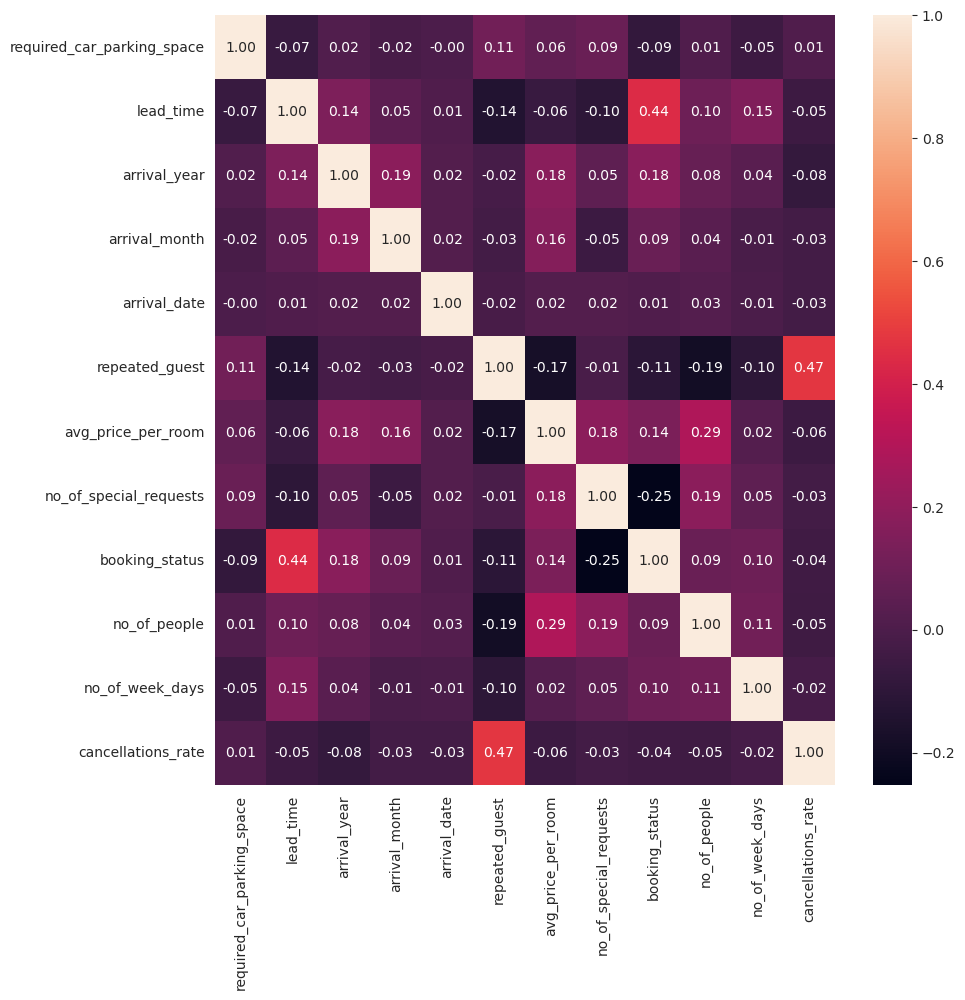

In [213]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='pearson', numeric_only=True),annot=True, fmt=".2f")

### Inferences
* "Booking_ID" is just holding the id it's not a feature that can effect the result
* I will not take the "arrival_date" because the correlation with booking_status is so low.
* Altough the "arrival_year" has a well correlation i am not going to take it too. Because we have only 2 years in this dataset 2017 and 2018. If we are going to make a prediction about the future these years are pointless. An event that made a difference may have occurred in either 2017 or 2018. For example assume that there was a pandemic in 2018 but not in 2017, in 2018 most of the books would be canceled and this would directly affect the result. In this case the thing that affect the result is events that might happen not the numbers.
* I will not take "room_type_reserved" too. When we think about it this column is relevant with "avg_price_per_room" and this one has higher correlation and more important for us so i will drop "room_type_reserved".
* "cancellations_rate" has also not well correlation with target column so i will drop it too.

In [214]:
df.drop(columns=["Booking_ID","room_type_reserved","arrival_year",
                 "arrival_date","cancellations_rate"],inplace=True)

## SCALING
* I will scale the numerical features

In [215]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[["lead_time","avg_price_per_room","no_of_people","no_of_week_days","no_of_special_requests"]] = scaler.fit_transform(df[["lead_time","avg_price_per_room","no_of_people","no_of_week_days","no_of_special_requests"]])

## Categorical Encoding

In [216]:
df.type_of_meal_plan.value_counts()

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

In [217]:
df.market_segment_type.value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [218]:
df = pd.get_dummies(df,columns=["type_of_meal_plan","market_segment_type"])

<Axes: >

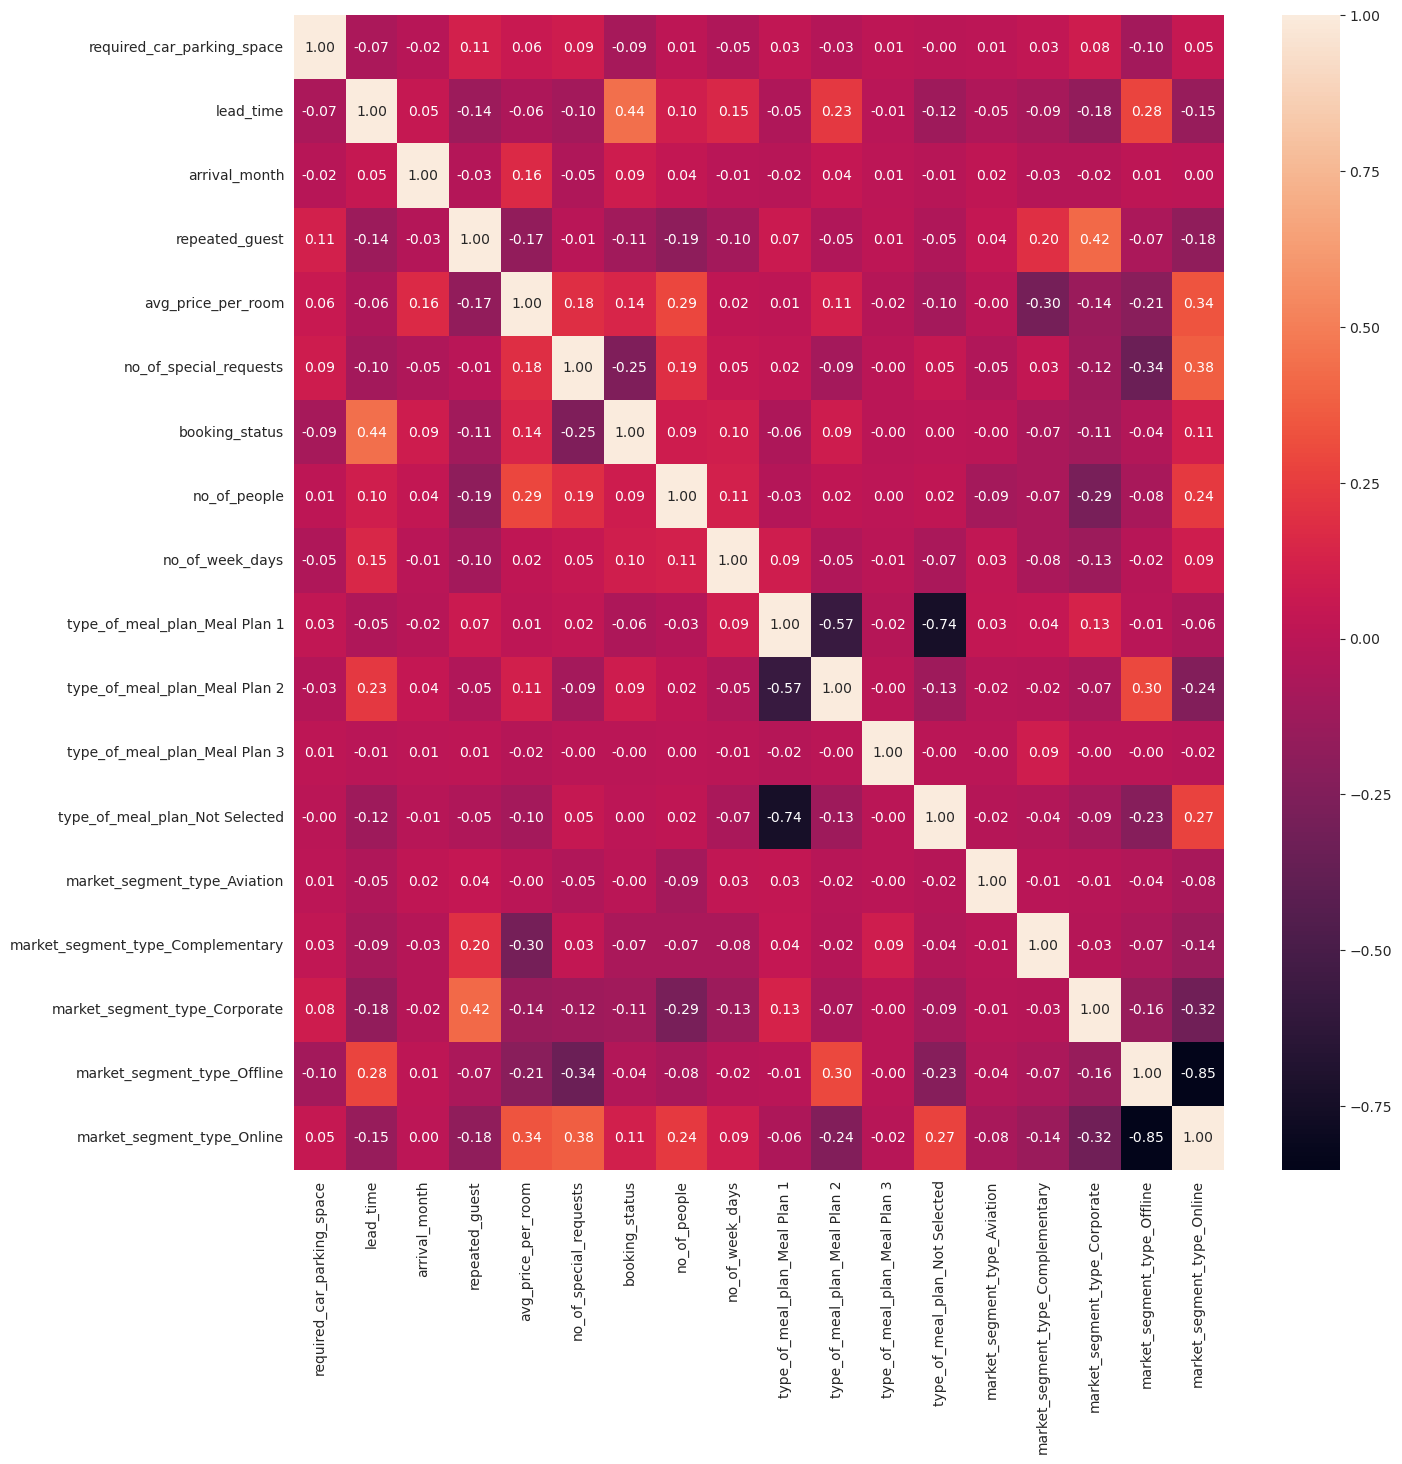

In [219]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True, fmt=".2f")

* I will drop some columns that have less samples and bad correlation with target column

In [220]:
df.drop(columns=['type_of_meal_plan_Meal Plan 3','type_of_meal_plan_Not Selected',
                 'market_segment_type_Aviation',"market_segment_type_Complementary","market_segment_type_Offline"],inplace=True)

In [221]:
df.head()

,required_car_parking_space,lead_time,arrival_month,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status,no_of_people,no_of_week_days,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,market_segment_type_Corporate,market_segment_type_Online
0,0,1.532110,0,0,-0.867758,0.0,0,0.000000,0.000000,True,False,False,False
1,0,-0.477064,0,0,0.182116,1.0,0,0.000000,0.642547,False,False,False,True
2,0,-0.513761,0,0,-0.993703,0.0,1,-25.914924,-0.452484,True,False,False,True
3,0,1.412844,1,0,0.013854,0.0,1,0.000000,-0.095031,True,False,False,True
4,0,-0.082569,1,0,-0.124685,0.0,1,0.000000,-0.547516,False,False,False,True


## Determine x and y

In [222]:
x = df.drop(columns="booking_status")
y = df.booking_status

# Train-Test Split

In [223]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (29020, 12)
Test_x : (7255, 12)
Train_y : (29020,)
Test_y : (7255,)


# Modeling With Random Forest Classifier

In [224]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(train_x, train_y)
print("Accuracy of Random Forest : % {}".format(rf.score(test_x,test_y)*100))

Accuracy of Random Forest : % 89.00068917987595


In [225]:
from sklearn.metrics import classification_report
y_pred = rf.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4839
           1       0.86      0.80      0.83      2416

    accuracy                           0.89      7255
   macro avg       0.88      0.87      0.87      7255
weighted avg       0.89      0.89      0.89      7255



* **Precision: Percentage of correct positive predictions relative to total positive predictions.**
    When we predict True, how often is it really True? This number should be as high as possible. \
     High precision: Not many True values were predicted as False
$$precision = \frac{TP}{TP+FP}$$
    *TP: true positive* \
    *FN: false negative*
    

* **Recall: Percentage of correct positive predictions relative to total actual positives.**
    The recall, also named sensivity, or hit rate, tells us the fraction of correctly identified positive predictions.
    What fraction of the True predictions were actually True? This number should be as high as possible. \
    High recall: Predicted most True values correctly.
$$recall = \frac{TP}{TP+FN}$$


* **F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.**
    The f1-score, or F measure, measures precision and recall at the same time by finding the harmonic mean of the two values. \
    This score is useful when you have opposite scores coming from precision and recall.

$$f1-Score = \frac{2*Precision * Recall}{Precision + Recall}$$


* **Support: The support is the number of occurrences of each class in your y_test.**

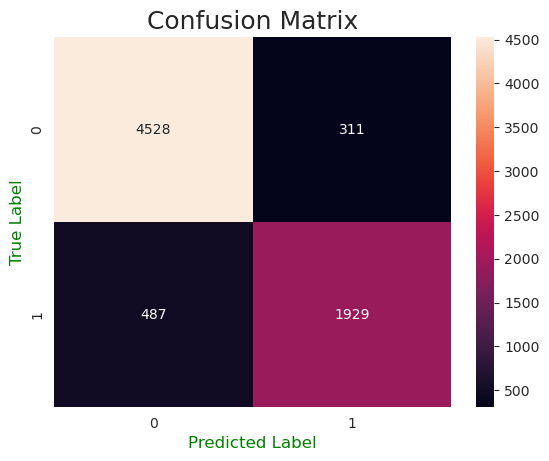

In [226]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_y,rf.predict(test_x)), annot=True, fmt=".0f")
plt.title("Confusion Matrix", fontsize=18)
plt.xlabel("Predicted Label", color = "green", fontsize = 12)
plt.ylabel("True Label", color = "green", fontsize = 12);

In [227]:
y_pred = rf.predict(test_x)
accuracy_0 = confusion_matrix(test_y, y_pred)[0][0] / (confusion_matrix(test_y, y_pred)[0][0]+ confusion_matrix(test_y, y_pred)[0][1])
accuracy_1 = confusion_matrix(test_y, y_pred)[1][1] / (confusion_matrix(test_y, y_pred)[1][0]+ confusion_matrix(test_y, y_pred)[1][1])

print("Accuracy of Not Cancelled :",accuracy_0)
print("Accuracy of Cancelled :", accuracy_1)

Accuracy of Not Cancelled : 0.9357305228352966
Accuracy of Cancelled : 0.7984271523178808


## Inferences
* As we see we have good accuracy.
* But when we check the other metrics we see that even though we predict not cancelled class so good (specificity) , we are not so good at predicting cancelled class (sensitivity).
* This is based on imbalanced dataset as i mentioned i think we need to get rid of this problem.
* First i will use undersampling method after that i will use oversampling.
* Finally i will compare the results.

# Under-Sampling
* Under-sampling is a technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class.
* NOTE : We should use sampling methods only upon the train dataset otherwise it would be inacurate.

In [228]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
train_x_undersampled,train_y_undersampled = rus.fit_resample(train_x,train_y)

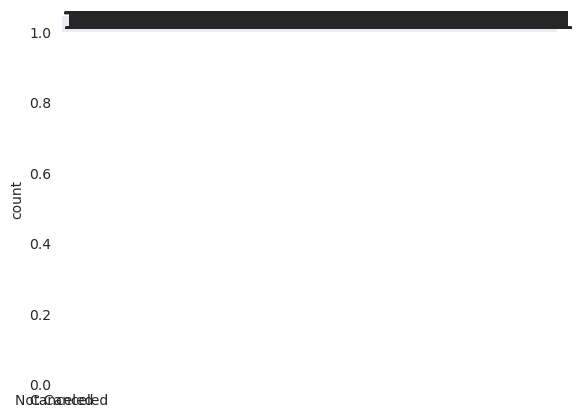

In [229]:
ax = sns.countplot(train_y_undersampled,palette=sns.cubehelix_palette(2))
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01),fontsize=18)
plt.xticks([0,1],["Not Canceled","Canceled"]);

# Modeling After Under-Sampling

## Random Forest

In [230]:
rf_sampled = RandomForestClassifier(n_estimators=110,random_state=42)
rf_sampled.fit(train_x_undersampled, train_y_undersampled)
print("Accuracy of Random Forest : % {}".format(rf_sampled.score(test_x,test_y)*100))

Accuracy of Random Forest : % 86.71261199172984


In [231]:
print(classification_report(test_y,rf_sampled.predict(test_x)))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      4839
           1       0.77      0.86      0.81      2416

    accuracy                           0.87      7255
   macro avg       0.85      0.87      0.85      7255
weighted avg       0.87      0.87      0.87      7255



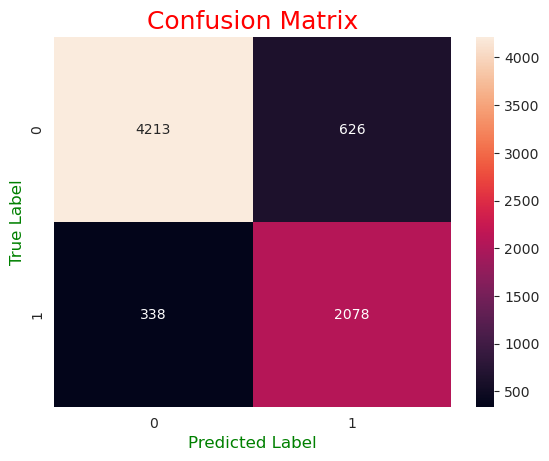

In [232]:
sns.heatmap(confusion_matrix(test_y,rf_sampled.predict(test_x)), annot=True, fmt=".0f")
plt.title("Confusion Matrix", color = "red", fontsize=18)
plt.xlabel("Predicted Label", color = "green", fontsize = 12)
plt.ylabel("True Label", color = "green", fontsize = 12);

In [233]:
accuracy_0 = confusion_matrix(test_y,rf_sampled.predict(test_x))[0][0] / (confusion_matrix(test_y,rf_sampled.predict(test_x))[0][0]+ confusion_matrix(test_y,rf_sampled.predict(test_x))[0][1])
accuracy_1 = confusion_matrix(test_y,rf_sampled.predict(test_x))[1][1] / (confusion_matrix(test_y,rf_sampled.predict(test_x))[1][0]+ confusion_matrix(test_y,rf_sampled.predict(test_x))[1][1])

print("Accuracy of Not Cancelled :",accuracy_0)
print("Accuracy of Cancelled :", accuracy_1)

Accuracy of Not Cancelled : 0.8706344286009506
Accuracy of Cancelled : 0.8600993377483444


### Inferences
* Although the specificity score decreases it seems that we solved the problem.
* Our accuracy has decreased but we predict both classes well and i think this one is more accurate.
* Because for the model before the sampling, if we have a dataset that is generated with mostly the canceled samples to predict the model will not be able to predict them accurately.
* Now lets try some other algorithms...

## XGB

In [234]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train_x_undersampled,train_y_undersampled)
print("Accuracy of XGB : % {}".format(xgb.score(test_x,test_y)*100))

Accuracy of XGB : % 86.4369400413508


In [235]:
print(classification_report(test_y,xgb.predict(test_x)))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      4839
           1       0.77      0.85      0.81      2416

    accuracy                           0.86      7255
   macro avg       0.84      0.86      0.85      7255
weighted avg       0.87      0.86      0.87      7255



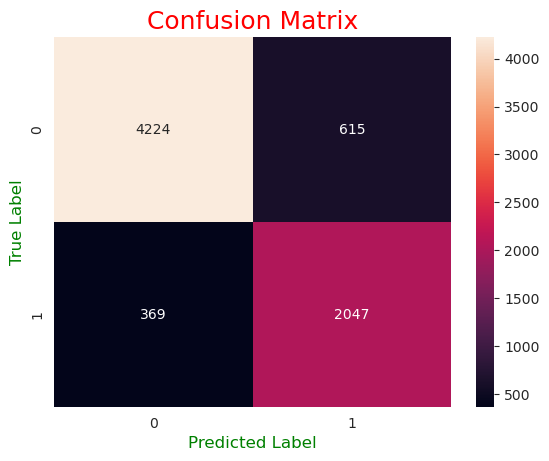

In [236]:
sns.heatmap(confusion_matrix(test_y,xgb.predict(test_x)), annot=True, fmt=".0f")
plt.title("Confusion Matrix", color = "red", fontsize=18)
plt.xlabel("Predicted Label", color = "green", fontsize = 12)
plt.ylabel("True Label", color = "green", fontsize = 12);

In [237]:
accuracy_0 = confusion_matrix(test_y,xgb.predict(test_x))[0][0] / (confusion_matrix(test_y,xgb.predict(test_x))[0][0]+ confusion_matrix(test_y,xgb.predict(test_x))[0][1])
accuracy_1 = confusion_matrix(test_y,xgb.predict(test_x))[1][1] / (confusion_matrix(test_y,xgb.predict(test_x))[1][0]+ confusion_matrix(test_y,xgb.predict(test_x))[1][1])

print("Accuracy of Not Cancelled :",accuracy_0)
print("Accuracy of Cancelled :", accuracy_1)

Accuracy of Not Cancelled : 0.8729076255424675
Accuracy of Cancelled : 0.8472682119205298


## Logistic Regression

In [238]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_x_undersampled,train_y_undersampled)
print("Accuracy of Logistic Regression : % {}".format(logreg.score(test_x,test_y)*100))

Accuracy of Logistic Regression : % 78.49758787043419


In [239]:
print(classification_report(test_y,logreg.predict(test_x)))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      4839
           1       0.65      0.76      0.70      2416

    accuracy                           0.78      7255
   macro avg       0.76      0.78      0.77      7255
weighted avg       0.80      0.78      0.79      7255



## SVC

In [240]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_x_undersampled,train_y_undersampled)
print("Accuracy of SVC : % {}".format(svc.score(test_x,test_y)*100))

Accuracy of SVC : % 78.12543073742246


In [241]:
print(classification_report(test_y,svc.predict(test_x)))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      4839
           1       0.64      0.76      0.70      2416

    accuracy                           0.78      7255
   macro avg       0.76      0.78      0.76      7255
weighted avg       0.80      0.78      0.79      7255



## CatBoost Classifier

In [242]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(random_state=0,metric_period=100)
cat.fit(train_x_undersampled,train_y_undersampled)
print("Accuracy of CatBoost Classifier : % {}".format(cat.score(test_x,test_y)*100))

Learning rate set to 0.036171
0:	learn: 0.6701122	total: 3.59ms	remaining: 3.58s
100:	learn: 0.3928962	total: 268ms	remaining: 2.38s
200:	learn: 0.3638408	total: 530ms	remaining: 2.11s
300:	learn: 0.3445735	total: 781ms	remaining: 1.81s
400:	learn: 0.3282195	total: 1.03s	remaining: 1.54s
500:	learn: 0.3163994	total: 1.27s	remaining: 1.27s
600:	learn: 0.3075322	total: 1.52s	remaining: 1.01s
700:	learn: 0.2993970	total: 1.78s	remaining: 759ms
800:	learn: 0.2924594	total: 2.03s	remaining: 504ms
900:	learn: 0.2862449	total: 2.28s	remaining: 251ms
999:	learn: 0.2806433	total: 2.53s	remaining: 0us
Accuracy of CatBoost Classifier : % 86.05099931082012


In [243]:
print(classification_report(test_y,cat.predict(test_x)))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      4839
           1       0.77      0.83      0.80      2416

    accuracy                           0.86      7255
   macro avg       0.84      0.85      0.85      7255
weighted avg       0.86      0.86      0.86      7255



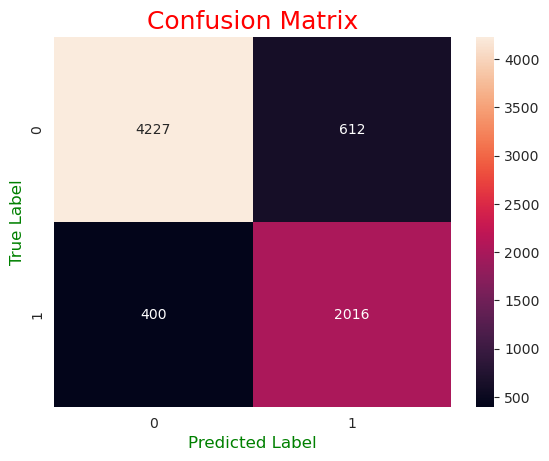

In [244]:
sns.heatmap(confusion_matrix(test_y,cat.predict(test_x)), annot=True, fmt=".0f")
plt.title("Confusion Matrix", color = "red", fontsize=18)
plt.xlabel("Predicted Label", color = "green", fontsize = 12)
plt.ylabel("True Label", color = "green", fontsize = 12);

## Inferences After Tried The Algorithms
* I tried some algorithms on this dataset and 3 of them worked well.
* These are Random Forest, XGB and CatBoost.
* In order to get better results i will benefit from these 3 algorithms by using ensemble learning with Voting Classifier.
* I hope i will get better results...

# What is Voting Classifier
* A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.

## Voting Classifier

In [245]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[("xgb",xgb),("rf_resampled",rf_sampled),("cat",cat)],
                          voting="soft",weights=[1,2.5,1.5])
voting.fit(train_x_undersampled,train_y_undersampled)
print("Accuracy of Voting Classifier : % {}".format(voting.score(test_x,test_y)*100))

Learning rate set to 0.036171
0:	learn: 0.6701122	total: 3.48ms	remaining: 3.48s
100:	learn: 0.3928962	total: 289ms	remaining: 2.57s
200:	learn: 0.3638408	total: 542ms	remaining: 2.15s
300:	learn: 0.3445735	total: 789ms	remaining: 1.83s
400:	learn: 0.3282195	total: 1.04s	remaining: 1.55s
500:	learn: 0.3163994	total: 1.29s	remaining: 1.28s
600:	learn: 0.3075322	total: 1.54s	remaining: 1.02s
700:	learn: 0.2993970	total: 1.78s	remaining: 762ms
800:	learn: 0.2924594	total: 2.04s	remaining: 506ms
900:	learn: 0.2862449	total: 2.29s	remaining: 251ms
999:	learn: 0.2806433	total: 2.53s	remaining: 0us
Accuracy of Voting Classifier : % 87.53962784286699


In [246]:
print(classification_report(test_y,voting.predict(test_x)))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      4839
           1       0.78      0.86      0.82      2416

    accuracy                           0.88      7255
   macro avg       0.86      0.87      0.86      7255
weighted avg       0.88      0.88      0.88      7255



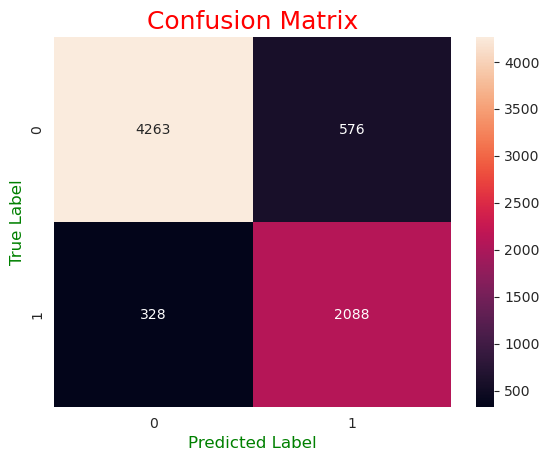

In [247]:
sns.heatmap(confusion_matrix(test_y,voting.predict(test_x)), annot=True, fmt=".0f")
plt.title("Confusion Matrix", color = "red", fontsize=18)
plt.xlabel("Predicted Label", color = "green", fontsize = 12)
plt.ylabel("True Label", color = "green", fontsize = 12);

In [248]:
accuracy_0 = confusion_matrix(test_y,voting.predict(test_x))[0][0] / (confusion_matrix(test_y,voting.predict(test_x))[0][0]+ confusion_matrix(test_y,voting.predict(test_x))[0][1])
accuracy_1 = confusion_matrix(test_y,voting.predict(test_x))[1][1] / (confusion_matrix(test_y,voting.predict(test_x))[1][0]+ confusion_matrix(test_y,voting.predict(test_x))[1][1])

print("Accuracy of Not Cancelled :",accuracy_0)
print("Accuracy of Cancelled :", accuracy_1)

Accuracy of Not Cancelled : 0.8809671419714817
Accuracy of Cancelled : 0.8642384105960265


* I combained 3 algorithms and got better accuracy and results for the other metrics.
* The weight of the Random Forest is higher than the others because it was the best algorithm for this dataset.
* Now i will apply oversampling and compare the results...

# SVM-SMOTE (Over-sampling)
* SVM-SMOTE, an over-sampling technique, is used to investigate how well it handles the trade-off. SMOTE, its ancestor, is a popular over-sampling technique which balances class distribution by synthetically generating new minority class instances along directions from existing minority class instances towards their nearest neighbours.SVM-SMOTE focuses on generating new minority class instances near borderlines with SVM so as to help establish boundary between classes.

https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5  
https://arxiv.org/pdf/1106.1813.pdf

In [249]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29020 entries, 25629 to 15795
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   required_car_parking_space     29020 non-null  int64  
 1   lead_time                      29020 non-null  float64
 2   arrival_month                  29020 non-null  int64  
 3   repeated_guest                 29020 non-null  int64  
 4   avg_price_per_room             29020 non-null  float64
 5   no_of_special_requests         29020 non-null  float64
 6   no_of_people                   29020 non-null  float64
 7   no_of_week_days                29020 non-null  float64
 8   type_of_meal_plan_Meal Plan 1  29020 non-null  bool   
 9   type_of_meal_plan_Meal Plan 2  29020 non-null  bool   
 10  market_segment_type_Corporate  29020 non-null  bool   
 11  market_segment_type_Online     29020 non-null  bool   
dtypes: bool(4), float64(5), int64(3)
memory usage: 

In [250]:
# convert to avoid error with rus.fit_resample
train_x["required_car_parking_space"] =train_x["required_car_parking_space"] .astype(np.float64)
train_x["arrival_month"] =train_x["arrival_month"] .astype(np.float64)
train_x["repeated_guest"] =train_x["repeated_guest"] .astype(np.float64)
train_x["type_of_meal_plan_Meal Plan 1"] =train_x["type_of_meal_plan_Meal Plan 1"] .astype(np.float64)
train_x["type_of_meal_plan_Meal Plan 2"] =train_x["type_of_meal_plan_Meal Plan 2"] .astype(np.float64)
train_x["market_segment_type_Corporate"] =train_x["market_segment_type_Corporate"] .astype(np.float64)
train_x["market_segment_type_Online"] =train_x["market_segment_type_Online"].astype(np.float64)

In [251]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29020 entries, 25629 to 15795
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   required_car_parking_space     29020 non-null  float64
 1   lead_time                      29020 non-null  float64
 2   arrival_month                  29020 non-null  float64
 3   repeated_guest                 29020 non-null  float64
 4   avg_price_per_room             29020 non-null  float64
 5   no_of_special_requests         29020 non-null  float64
 6   no_of_people                   29020 non-null  float64
 7   no_of_week_days                29020 non-null  float64
 8   type_of_meal_plan_Meal Plan 1  29020 non-null  float64
 9   type_of_meal_plan_Meal Plan 2  29020 non-null  float64
 10  market_segment_type_Corporate  29020 non-null  float64
 11  market_segment_type_Online     29020 non-null  float64
dtypes: float64(12)
memory usage: 2.9 MB


In [252]:
from imblearn.over_sampling import SVMSMOTE

rus = SVMSMOTE(random_state=0)
train_x_oversampled,train_y_oversampled = rus.fit_resample(train_x,train_y)

# Modeling After Over-Sampling

## Random Forest

In [253]:
rf_oversampled = RandomForestClassifier(n_estimators=80,random_state=42)
rf_oversampled.fit(train_x_oversampled, train_y_oversampled)
print("Accuracy of Random Forest : % {}".format(rf_oversampled.score(test_x,test_y)*100))

Accuracy of Random Forest : % 88.00827015851137


In [254]:
print(classification_report(test_y,rf_oversampled.predict(test_x)))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4839
           1       0.81      0.83      0.82      2416

    accuracy                           0.88      7255
   macro avg       0.86      0.87      0.87      7255
weighted avg       0.88      0.88      0.88      7255



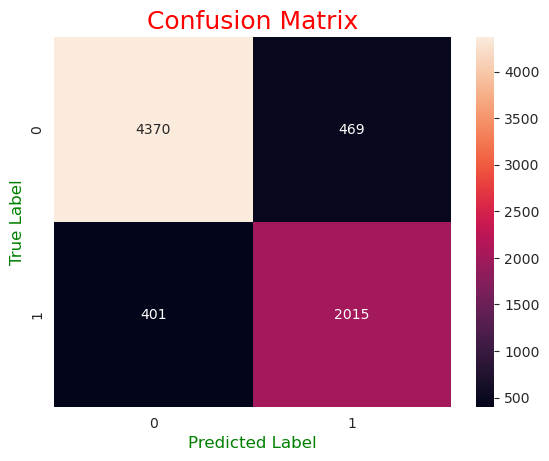

In [255]:
sns.heatmap(confusion_matrix(test_y,rf_oversampled.predict(test_x)), annot=True, fmt=".0f")
plt.title("Confusion Matrix", color = "red", fontsize=18)
plt.xlabel("Predicted Label", color = "green", fontsize = 12)
plt.ylabel("True Label", color = "green", fontsize = 12);

In [256]:
accuracy_0 = confusion_matrix(test_y,rf_oversampled.predict(test_x))[0][0] / (confusion_matrix(test_y,rf_oversampled.predict(test_x))[0][0]+ confusion_matrix(test_y,rf_oversampled.predict(test_x))[0][1])
accuracy_1 = confusion_matrix(test_y,rf_oversampled.predict(test_x))[1][1] / (confusion_matrix(test_y,rf_oversampled.predict(test_x))[1][0]+ confusion_matrix(test_y,rf_oversampled.predict(test_x))[1][1])

print("Accuracy of Not Cancelled :",accuracy_0)
print("Accuracy of Cancelled :", accuracy_1)

Accuracy of Not Cancelled : 0.9030791485844183
Accuracy of Cancelled : 0.8340231788079471


## XGB

In [257]:
xgb_over = XGBClassifier()
xgb_over.fit(train_x_oversampled,train_y_oversampled)
print("Accuracy of XGB : % {}".format(xgb_over.score(test_x,test_y)*100))

Accuracy of XGB : % 86.29910406616126


In [258]:
print(classification_report(test_y,xgb_over.predict(test_x)))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      4839
           1       0.77      0.83      0.80      2416

    accuracy                           0.86      7255
   macro avg       0.84      0.85      0.85      7255
weighted avg       0.87      0.86      0.86      7255



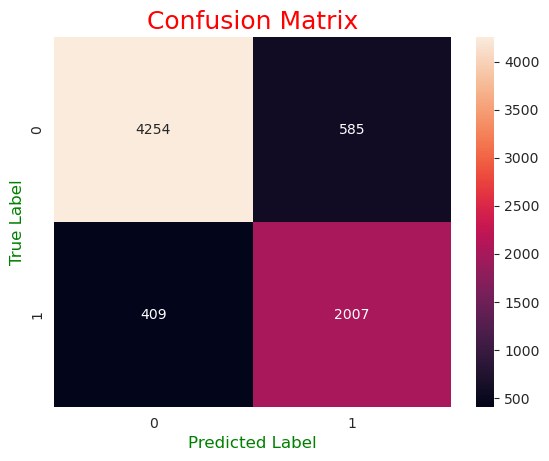

In [259]:
sns.heatmap(confusion_matrix(test_y,xgb_over.predict(test_x)), annot=True, fmt=".0f")
plt.title("Confusion Matrix", color = "red", fontsize=18)
plt.xlabel("Predicted Label", color = "green", fontsize = 12)
plt.ylabel("True Label", color = "green", fontsize = 12);

In [260]:
accuracy_0 = confusion_matrix(test_y,xgb_over.predict(test_x))[0][0] / (confusion_matrix(test_y,xgb_over.predict(test_x))[0][0]+ confusion_matrix(test_y,xgb_over.predict(test_x))[0][1])
accuracy_1 = confusion_matrix(test_y,xgb_over.predict(test_x))[1][1] / (confusion_matrix(test_y,xgb_over.predict(test_x))[1][0]+ confusion_matrix(test_y,xgb_over.predict(test_x))[1][1])

print("Accuracy of Not Cancelled :",accuracy_0)
print("Accuracy of Cancelled :", accuracy_1)

Accuracy of Not Cancelled : 0.8791072535647861
Accuracy of Cancelled : 0.8307119205298014


## CatBoost Classifier

In [261]:
cat_over = CatBoostClassifier(random_state=42,metric_period=100)
cat_over.fit(train_x_oversampled,train_y_oversampled)
print("Accuracy of CatBoost Classifier : % {}".format(cat_over.score(test_x,test_y)*100))

Learning rate set to 0.049295
0:	learn: 0.6694555	total: 5.24ms	remaining: 5.24s
100:	learn: 0.4104483	total: 356ms	remaining: 3.17s
200:	learn: 0.3641813	total: 680ms	remaining: 2.7s
300:	learn: 0.3317968	total: 997ms	remaining: 2.31s
400:	learn: 0.3140526	total: 1.32s	remaining: 1.97s
500:	learn: 0.2996824	total: 1.64s	remaining: 1.63s
600:	learn: 0.2864497	total: 1.96s	remaining: 1.3s
700:	learn: 0.2769431	total: 2.27s	remaining: 970ms
800:	learn: 0.2686832	total: 2.59s	remaining: 645ms
900:	learn: 0.2615517	total: 2.91s	remaining: 320ms
999:	learn: 0.2550303	total: 3.24s	remaining: 0us
Accuracy of CatBoost Classifier : % 87.15368711233631


In [262]:
print(classification_report(test_y,cat_over.predict(test_x)))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4839
           1       0.80      0.81      0.81      2416

    accuracy                           0.87      7255
   macro avg       0.85      0.86      0.86      7255
weighted avg       0.87      0.87      0.87      7255



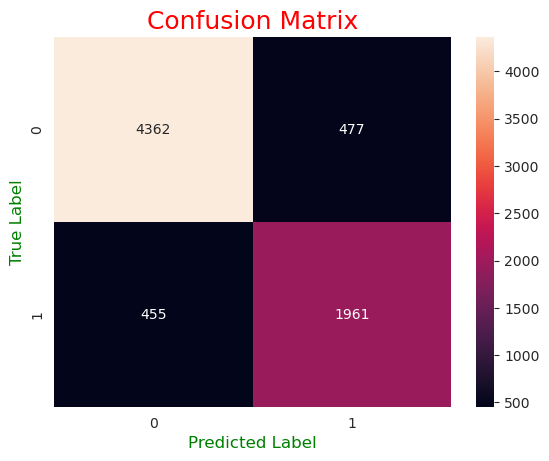

In [263]:
sns.heatmap(confusion_matrix(test_y,cat_over.predict(test_x)), annot=True, fmt=".0f")
plt.title("Confusion Matrix", color = "red", fontsize=18)
plt.xlabel("Predicted Label", color = "green", fontsize = 12)
plt.ylabel("True Label", color = "green", fontsize = 12);

## Voting Classifier

In [264]:
voting_over = VotingClassifier(estimators=[("xgb_over",xgb_over),("rf_oversampled",rf_oversampled),("cat_over",cat_over)],
                          voting="soft",weights=[1,2.5,1])
voting_over.fit(train_x_oversampled,train_y_oversampled)
print("Accuracy of Voting Classifier : % {}".format(voting_over.score(test_x,test_y)*100))

Learning rate set to 0.049295
0:	learn: 0.6694555	total: 5.42ms	remaining: 5.42s
100:	learn: 0.4104483	total: 344ms	remaining: 3.06s
200:	learn: 0.3641813	total: 664ms	remaining: 2.64s
300:	learn: 0.3317968	total: 983ms	remaining: 2.28s
400:	learn: 0.3140526	total: 1.3s	remaining: 1.95s
500:	learn: 0.2996824	total: 1.62s	remaining: 1.61s
600:	learn: 0.2864497	total: 1.94s	remaining: 1.29s
700:	learn: 0.2769431	total: 2.25s	remaining: 962ms
800:	learn: 0.2686832	total: 2.58s	remaining: 641ms
900:	learn: 0.2615517	total: 2.91s	remaining: 320ms
999:	learn: 0.2550303	total: 3.25s	remaining: 0us
Accuracy of Voting Classifier : % 88.42177808407995


In [265]:
print(classification_report(test_y,voting_over.predict(test_x)))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      4839
           1       0.82      0.84      0.83      2416

    accuracy                           0.88      7255
   macro avg       0.87      0.87      0.87      7255
weighted avg       0.89      0.88      0.88      7255



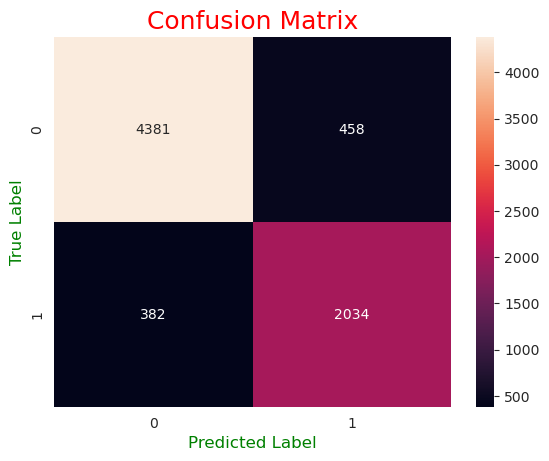

In [266]:
sns.heatmap(confusion_matrix(test_y,voting_over.predict(test_x)), annot=True, fmt=".0f")
plt.title("Confusion Matrix", color = "red", fontsize=18)
plt.xlabel("Predicted Label", color = "green", fontsize = 12)
plt.ylabel("True Label", color = "green", fontsize = 12);

In [267]:
accuracy_0 = confusion_matrix(test_y,voting_over.predict(test_x))[0][0] / (confusion_matrix(test_y,voting_over.predict(test_x))[0][0]+ confusion_matrix(test_y,voting_over.predict(test_x))[0][1])
accuracy_1 = confusion_matrix(test_y,voting_over.predict(test_x))[1][1] / (confusion_matrix(test_y,voting_over.predict(test_x))[1][0]+ confusion_matrix(test_y,voting_over.predict(test_x))[1][1])

print("Accuracy of Not Cancelled :",accuracy_0)
print("Accuracy of Cancelled :", accuracy_1)

Accuracy of Not Cancelled : 0.9053523455259351
Accuracy of Cancelled : 0.8418874172185431


# Conclusion
* First, i created a model with Random Forest and i realized that despite of getting good accuracy this dataset was unbalanced.
* Then i tried to solve this problem by using under-sampling method and i got balanced accuracies from both classes altough the accuracy decreased. But i think this one was more accurate when we create a ML model.
* After under-sampling i used some other algorithms except Random Forest, some of them worked well and i wanted to benefit from all of these algorithms so i used ensemble learning technique. I got better result as i expected.
* After that i wondered that how over-sampling method can work.
* I applied the same algorithms and we saw the results.
* Actually i could not decide which one is better.
* Under-Sampling : Specificity = % 88, Sensitivity = % 86
* Over-Sampling  : Specificity = % 90, Sensitivity = % 84
* We can say that we solved the imbalanced dataset problem with both techniques, they have just little diferences but in my opinion both techniques can be used.
* What do you think which technique should be used for this dataset ?
* If you liked this notebook please upvote it and you can share your ideas with me...